# Solution for Logistic Regression (Supervised Learning)
## Problem Statement:

Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large! 
Knowing all of this, On the Road car insurance have requested your services in **building a model to predict whether a customer will make a claim on their insurance during the policy period** . As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production
They have supplied you with their customer data as a csv file call e`d car_insurance.c` .k
1. Identify the single feature of the data that is the best predictor of whether a customer will put in a claim.'
2. Store as a DataFrame called  *best_feature_df*  with the name of the feature with the highest accuracy and the respective accuracy score
    ## Result
The feature with the highest accuracy among all of the predictors is the age. Its accuracy, i.e., the proportion of correctly classified outcomes, is 69%, as shown in the last step of the code.
w.


# Code 

In [7]:
# Import requried packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

In [8]:
pwd

'C:\\Users\\OK'

In [9]:
# Load and Explore Data
# Read in the csv file 
car_ins_orig = pd.read_csv(r"C:\Users\OK\Documents\Self\I know Python\car_insurance.csv")

In [10]:
# Explore the file
car_ins_orig.head()
car_ins_orig.info()
car_ins_orig.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [11]:
# Identify and replace missing values
## Identify columns with missing values
print(car_ins_orig.isna().any())
car_ins_orig["credit_score"].mean() # mean = 0.516
car_ins_orig["annual_mileage"].mean() # mean = 11,697

id                     False
age                    False
gender                 False
driving_experience     False
education              False
income                 False
credit_score            True
vehicle_ownership      False
vehicle_year           False
married                False
children               False
postal_code            False
annual_mileage          True
vehicle_type           False
speeding_violations    False
duis                   False
past_accidents         False
outcome                False
dtype: bool


11697.003206900365

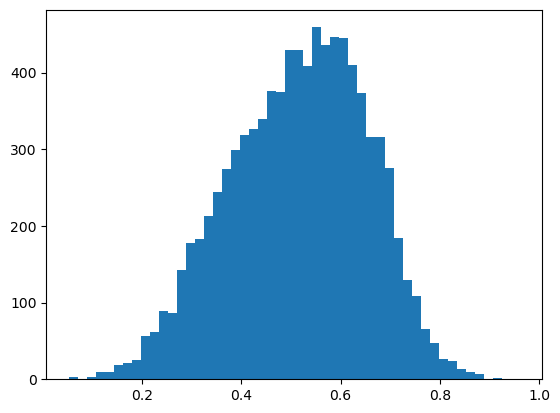

In [12]:
# Check distribution of the variables with missing values (to confirm normality for replacement with the mean)
plt.hist(car_ins_orig["credit_score"], bins = 50)
plt.show()

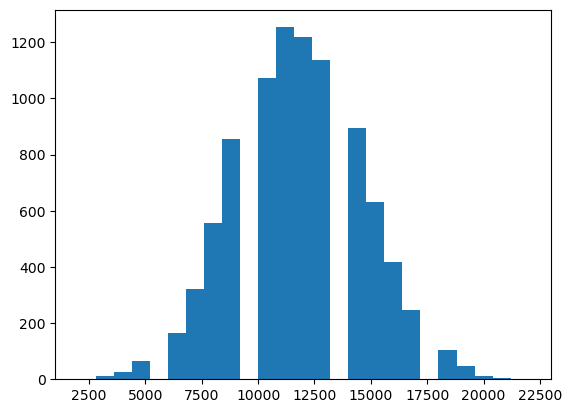

In [13]:
plt.hist(car_ins_orig["annual_mileage"], bins = 25)
plt.show()

In [14]:
## Replace missing values with corresponding means for both variables.
car_ins_filled = car_ins_orig.fillna({"credit_score": car_ins_orig["credit_score"].mean(), "annual_mileage": car_ins_orig["annual_mileage"].mean()})

In [15]:
## Confirm no missing values and filled means
print(car_ins_filled.isna().any())
car_ins_filled["credit_score"].mean() # mean = 0.516
car_ins_filled["annual_mileage"].mean() # mean = 11,697

id                     False
age                    False
gender                 False
driving_experience     False
education              False
income                 False
credit_score           False
vehicle_ownership      False
vehicle_year           False
married                False
children               False
postal_code            False
annual_mileage         False
vehicle_type           False
speeding_violations    False
duis                   False
past_accidents         False
outcome                False
dtype: bool


11697.003206900365

In [16]:
# Prepare for modeling
## Set up an empty list for models per feature and a feature-only variable
models = []
features = car_ins_filled.drop(columns=["id", "outcome"]).columns

In [17]:
## Create a for loop for each predictor
for col in features:
    model = logit(f"outcome ~ {col}", data=car_ins_filled).fit()
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [18]:
## Check accuracies of each model by creating a confusion matrix
accuracies = []
for feature in range(0, len(models)):
    conf_matrix = models[feature].pred_table()

In [19]:
## Calculate accuracy rates
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [20]:
accuracy = (TN + TP) / (TN + FN + FP + TP)
accuracies.append(accuracy)

In [21]:
## Identify feature with highest accuracy
best_feature = features[accuracies.index(max(accuracies))]

In [22]:
## Create best_feature_df
best_feature_df = pd.DataFrame({"best_feature": best_feature,
                                "best_accuracy": max(accuracies)},
                                index=[0])

In [23]:
print(best_feature_df)

  best_feature  best_accuracy
0          age         0.6867
